# Monte Carlo in Corporate Finance

## Predict Gross Profit

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
rev_mean = 170
rev_stdev = 20
iterations = 1000

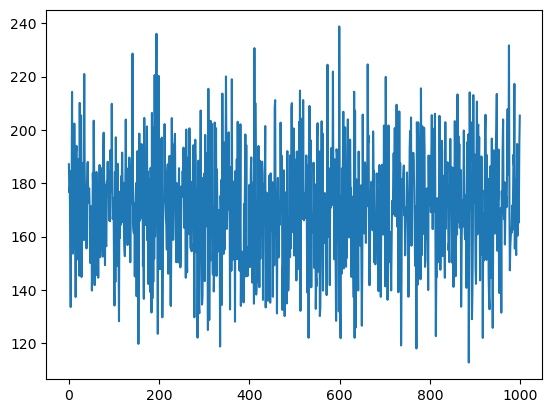

In [10]:
rev = np.random.normal(rev_mean,rev_stdev,iterations)

plt.plot(rev)
plt.show()

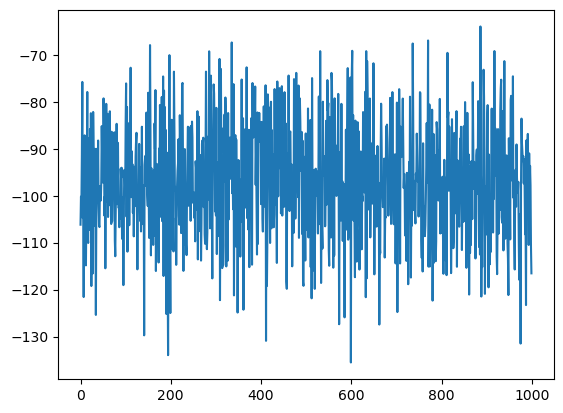

In [20]:
# To calculate COGS (Cost of Goods Sold)
COGS = - (rev * np.random.normal(0.6,0.1))

plt.plot(COGS)
plt.show()

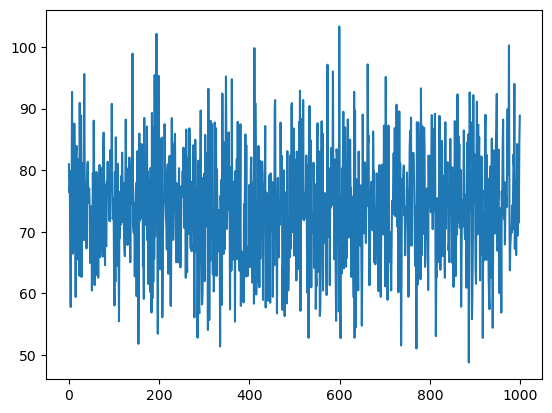

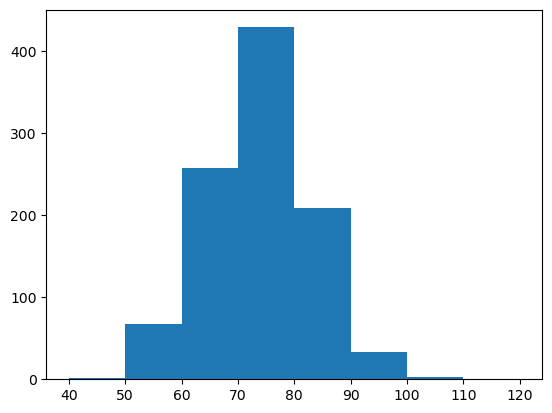

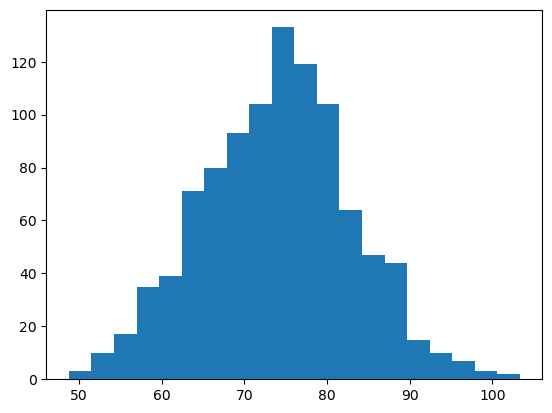

In [28]:
Gross_Profit = rev+COGS

plt.plot(Gross_Profit)
plt.show()

plt.hist(Gross_Profit, bins = [40,50,60,70,80,90,100,110,120])
plt.show()

plt.hist(Gross_Profit, bins = 20)
plt.show()

## Predict stock price (Brownian motion) 

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [8]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = yf.download(ticker, start = '2014-01-01' ,end='2023-12-31')['Close']

[*********************100%***********************]  1 of 1 completed


In [10]:
log_returns = np.log(1+data.pct_change())
log_returns

,PG
Date,
2014-01-02,NaN
2014-01-03,-0.001118
2014-01-06,0.002359
2014-01-07,0.009626
2014-01-08,-0.014599
...,...
2023-12-22,0.007046
2023-12-26,0.004533
2023-12-27,0.000822


<Axes: xlabel='Date'>

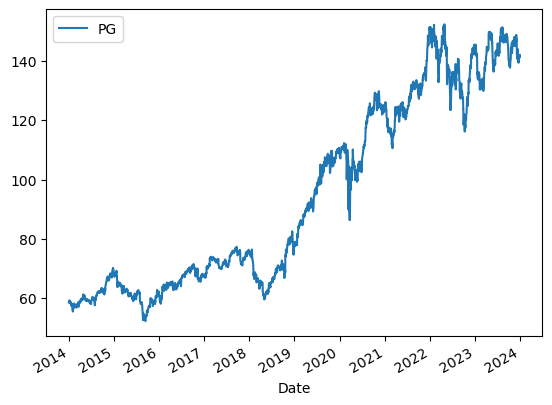

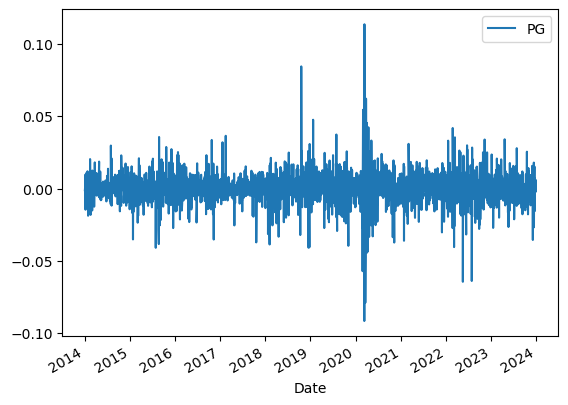

In [12]:
data.plot()
log_returns.plot()

In [18]:
u = log_returns.mean()
u

PG    0.000352
dtype: float64

In [20]:
var = log_returns.var()
var

PG    0.000132
dtype: float64

In [28]:
drift = u - (0.5 * var)
drift

pandas.core.series.Series

In [32]:
stdev = log_returns.std()
stdev

pandas.core.series.Series

In [34]:
X = np.random.rand(10,2) # 10*2 matrix
X

array([[0.30423682, 0.07431854],
       [0.34658034, 0.11672034],
       [0.02066003, 0.02292707],
       [0.95409301, 0.15835757],
       [0.75533294, 0.77330392],
       [0.09233846, 0.32666748],
       [0.09315596, 0.24097555],
       [0.55923538, 0.95156592],
       [0.32158015, 0.63238356],
       [0.24535937, 0.57312147]])

In [36]:
norm.ppf(X)

array([[-0.51225345, -1.44436235],
       [-0.39456943, -1.19154249],
       [-2.04030393, -1.99673345],
       [ 1.6859056 , -1.00123102],
       [ 0.69136831,  0.74977178],
       [-1.3264916 , -0.44913404],
       [-1.32156839, -0.70316793],
       [ 0.1490309 ,  1.66023017],
       [-0.46328473,  0.33817293],
       [-0.68916611,  0.18432685]])

In [42]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.46941669,  1.31436267],
       [-0.09507665,  0.27758107],
       [-0.21097349,  1.49566339],
       [ 0.41454658, -1.19664238],
       [ 0.48880975, -1.03484176],
       [ 0.05883844,  0.1472763 ],
       [-0.31714368, -0.86337223],
       [-0.26262021,  1.51109692],
       [-0.20188178, -0.2480277 ],
       [ 0.48431553, -0.4804583 ]])

In [58]:
t_intervals = 1000 # for the next 1000 days
iterations = 10 # 10 simulations

In [62]:
daily_returns = np.exp(drift.values+stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[0.99332192, 1.01558017, 1.0079775 , ..., 0.99635711, 0.99623573,
        1.00191628],
       [1.00615909, 1.00661261, 1.02014975, ..., 1.01090224, 0.99370861,
        0.99689553],
       [1.00278928, 1.00693555, 1.00346746, ..., 1.01163567, 0.99279245,
        1.01546042],
       ...,
       [1.00177445, 0.99604481, 1.00061535, ..., 0.99619922, 1.00712679,
        0.99805062],
       [1.01264766, 1.00447843, 0.98661399, ..., 0.99112724, 1.00147332,
        0.99505017],
       [1.00964639, 0.99308304, 1.00556866, ..., 1.01513792, 1.016983  ,
        1.00182838]])

In [68]:
S0 = data.iloc[-1]
S0

PG    142.113876
Name: 2023-12-29 00:00:00, dtype: float64

In [72]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
price_list[0] = S0
price_list

array([[142.11387634, 142.11387634, 142.11387634, ..., 142.11387634,
        142.11387634, 142.11387634],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [80]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]
price_list

array([[142.11387634, 142.11387634, 142.11387634, ..., 142.11387634,
        142.11387634, 142.11387634],
       [142.98916818, 143.05362068, 144.97743567, ..., 143.66323576,
        141.21978251, 141.6726876 ],
       [143.38800446, 144.04577646, 145.48013845, ..., 145.33485447,
        140.20193413, 143.86300673],
       ...,
       [245.50325837, 150.76008921, 106.47705708, ..., 259.96185911,
        300.08305193, 305.03377194],
       [248.60830018, 151.43525733, 105.05175411, ..., 257.65527884,
        300.52517059, 303.52390796],
       [251.00647262, 150.38778544, 105.63675213, ..., 261.55564409,
        305.62898919, 304.07886443]])

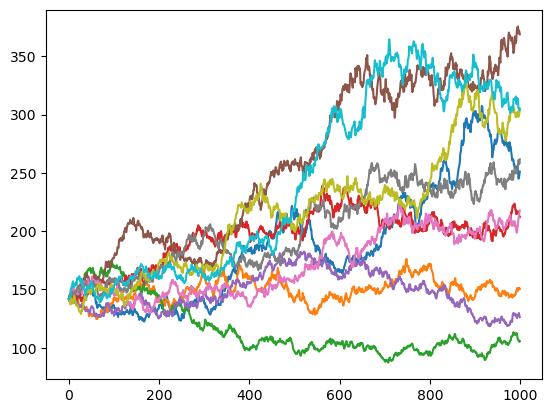

In [86]:
plt.plot(price_list)